In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

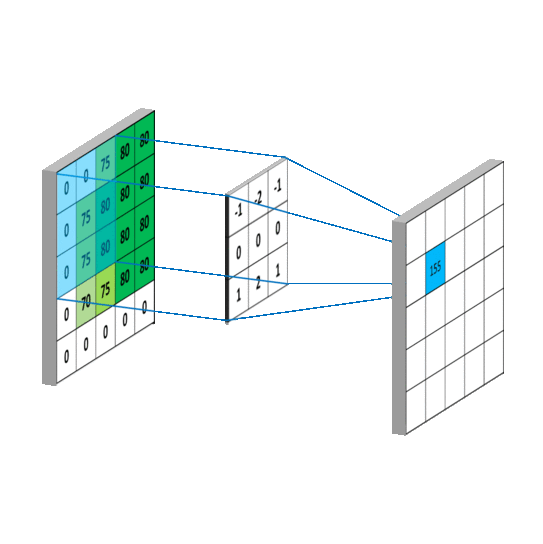

# 卷积神经网络：就是特征提取器 CBAPD

# 感受野（Receptive Field ）
**定义：** 卷积神经网络的输出特征图中的每个像素点，在原始输入图片上映射区域的大小。  
**例子：**  
*5x5 → 5x5 → 1x1 $~~~~~~~~~~$经过一层 5x5 卷积核 它的感受野是5*  
*5x5 → 3x3 → 3x3 → 1x1 经过两层 3x3 卷积核 它的感受野也是5*  
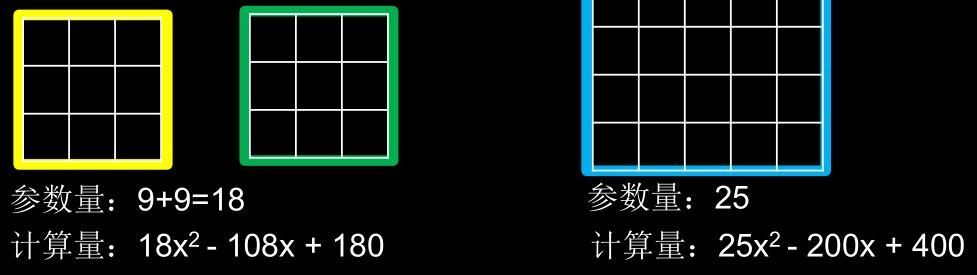
+ **结论：** 当x > 10时，两层3x3卷积核的计算量优于 一层5x5卷积核

# 全零填充 (Padding)
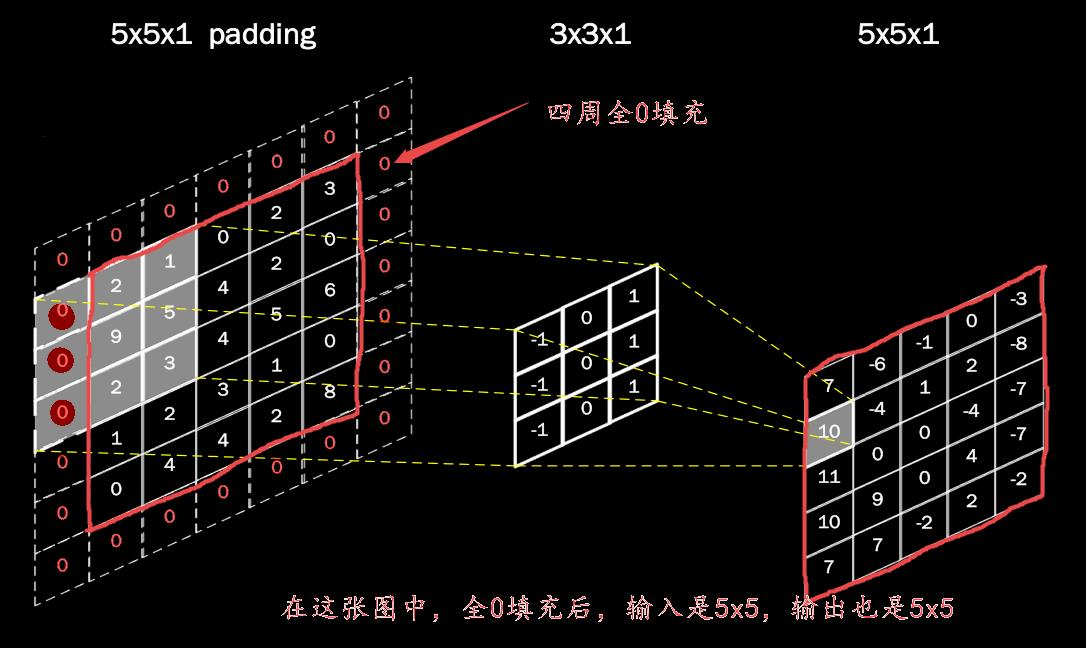
+ TensorFlow代码：
1. 全零填充代码：padding = 'SAME'
    $$\mbox{全零填充：  }输出尺寸 = \frac{原长}{步长}{（向上取整）}$$

2. 不填充代码： padding = 'VALID'
    $$\mbox{不全零填充： }输出尺寸 = \frac{原长 - 核长 + 1}{步长}{（向上取整）}$$

# 卷积层（Conv2D）
**tf.keras.layers.Conv2D** (  
filters = 卷积核个数,  
kernel_size = 卷积核尺寸, #正方形写核长整数，或（核高h，核宽w）  
strides =  滑动步长, #横纵向相同写步长整数，或(纵向步长h，横向步长w)，默认1  
padding = “same” or “valid”, #使用全零填充是“same”，不使用是“valid”（默认）  
activation = “ relu ” or “ sigmoid ” or “ tanh ” or “ softmax”等 , <font color=red># 如有BN 此处不写</font>  
input_shape = (高, 宽 , 通道数) # 输入特征图维度，可省略  
)    

*例子：Conv2D (filters=6, kernel_size=(5, 5),padding='valid', activation='sigmoid')*

# 批标准化 (Batch Normalization (BN) )
**解释**：神经网络特别青睐 "0" 附近的数字。为了使神经网络效率更高，我们有了标准化：  
**标准化**：使数据符合0 均值，1 为标准差的分布。  
**批标准化**：对一小批数据（batch ），做标准化处理。  
**BN 层位于卷积层之后，激活层之前。**  
+ **tf.keras.layers.BatchNormalization()**  
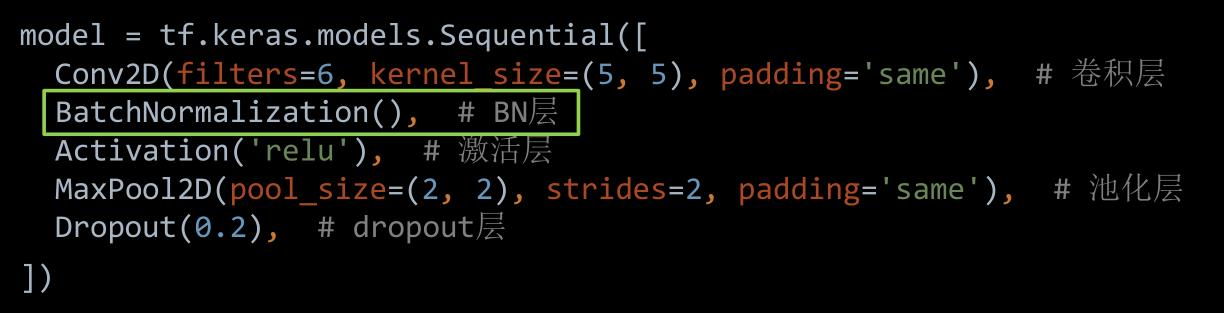

# 池化 (Pooling)

**池化，可以减少特征数据量。**

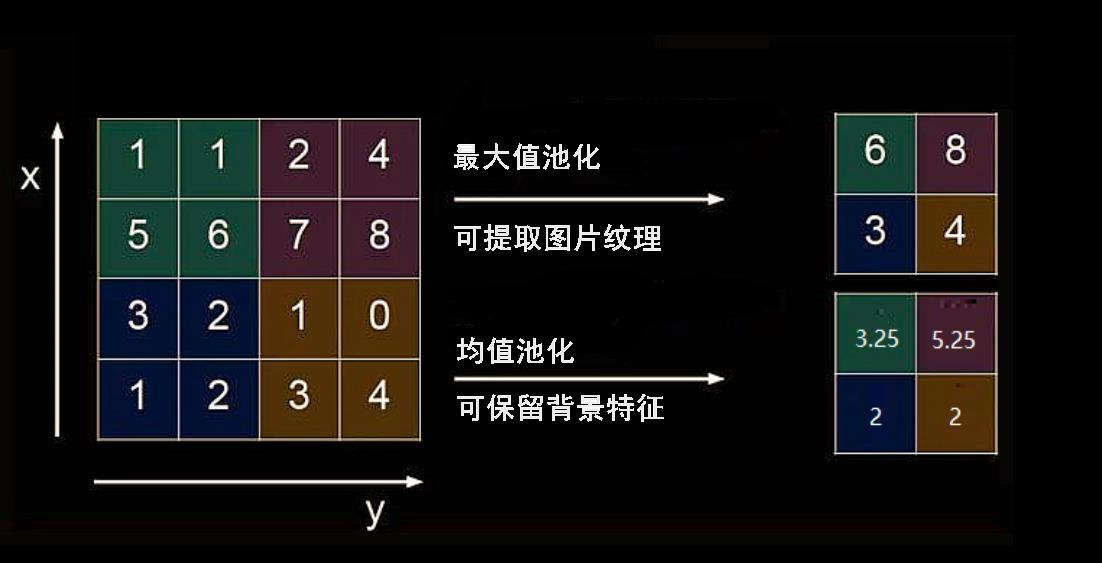



**tf.keras.layers.MaxPool2D(**  
pool_size= 池化核尺寸，#正方形核长，或（核高h，核宽w）  
strides= 池化步长，#步长，或(纵向步长h，横向步长w)，默认为pool_size  
padding=‘valid’or‘same’ # 使用全零填充是“same”，不使用是“valid”（默认）  
)

**tf.keras.layers.AveragePooling2D(**  
pool_size= 池化核尺寸，#正方形核长，或（核高h，核宽w）  
strides= 池化步长，#步长，或(纵向步长h，横向步长w)，默认为pool_size  
padding=‘valid’or‘same’ # 使用全零填充是“same”，不使用是“valid”（默认）  
)

# 舍弃 (Dropout)
**解释：**为了缓解神经网络过拟合，在训练时，将一部分不参加神经网络训练的神经元按照一定比例从神经网络中暂时舍弃。神经网络使用时，被舍弃的神经元恢复链接。
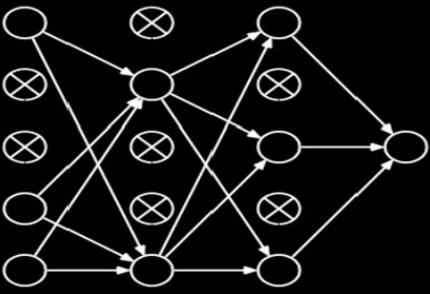
代码：  
**tf.keras.layers.Dropout(0.2)** （舍弃的比例）

# CIFAR-10数据集
　　50000 + 10000 张 32x32 彩色图像，分为10个类每类6000张图。这里面有50000张用于训练；另外10000用于测试。  
  （飞机：0）（汽车：1）（鸟：2）（猫：3）（鹿：4）（狗：5）（青蛙：6）（马：7）（船：8）（卡车：9）
 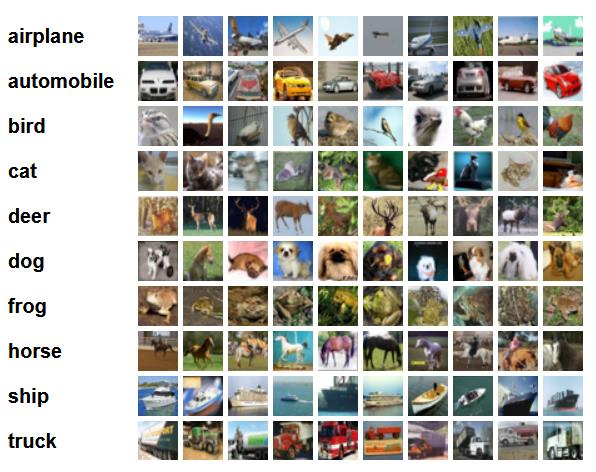

In [ ]:
# 导入cifar10数据集：
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
print('第一个样本的特征形状：',x_train[0].shape)
np.set_printoptions(threshold=np.inf) # 无限打印
print('第一个样本的特征矩阵：',x_train[0])
'''是一个32行32列的三通道rgb值'''

In [ ]:
print('第一个样本的标签形状：',y_train[0].shape)
print('第一个样本的标签矩阵：',y_train[0])

In [ ]:
print('训练集-输入特征-形状：',x_train.shape)
print('训练集 - 标签 - 形状：',y_train.shape)
print('测试集-输入特征-形状：',x_test.shape)
print('测试集 - 标签 - 形状：',y_test.shape)

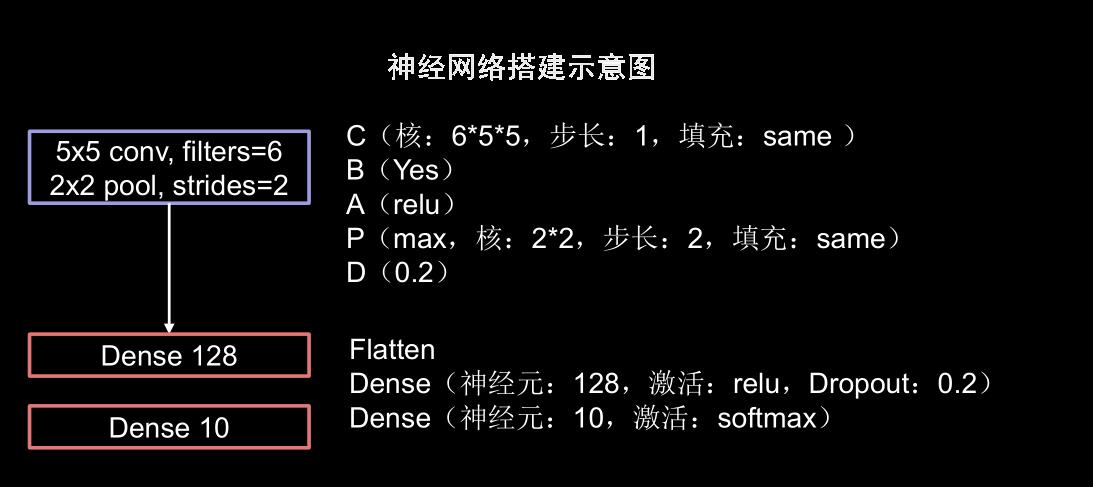

In [ ]:
# ***************************     标准CBAPD卷积神经网络     **************************
# =============================        1.import          =============================
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
# =============================     2.测试集、训练集     =============================
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# ==============================  3.卷积神经网络的搭建  ==============================

# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')   # 卷积层 C
        self.b1 = BatchNormalization()                                    # BN层 B
        self.a1 = Activation('relu')                                      # 激活层 A
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层 P
        self.d1 = Dropout(0.2)                                            # dropout层 D
        
        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y
model = Baseline()
# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New

# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] 
)
# =============================      5.断点续训     ==========================

checkpoint_save_path = '../class5/CIFAR10_CNN/checkpoint/Baseline.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------------------读取已存模型----------------------------')
    model.load_weights(checkpoint_save_path)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only = True)

history = model.fit(x_train,y_train,batch_size=32,epochs=5,
                    validation_data=(x_test, y_test),validation_freq=1,
                    callbacks = [ckpt_callback])

# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()

# =============================  7.参数提取，把参数存入文本  =========================
np.set_printoptions(threshold=np.inf) # 超过多少省略打印
# print(model.trainable_variables) # 打印所有可训练参数
file = open('../class5/CIFAR10_CNN/checkpoint/Baseline_weights.txt', 'w')
for v in model.trainable_variables: # 将参数写入txt文本
   file.write(str(v.name) + '\n')
   file.write(str(v.shape) + '\n')
   file.write(str(v.numpy()) + '\n')
file.close()
# =============================  8.显示训练集和验证集的acc和loss曲线  =========================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='训练集准确率')
plt.plot(val_acc, label='测试集准确率')
plt.title('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='训练集误差')
plt.plot(val_loss, label='测试集误差')
plt.title('误差')
plt.legend()
plt.show()

# LeNet卷积神经计算网络
LeNet由Yann LeCun于1998年提出，卷积网络开篇之作。  
*Yann Lecun, Leon Bottou, Y. Bengio, Patrick Haffner. Gradient-Based Learning Applied to Document Recognition. Proceedings of the IEEE, 1998.*
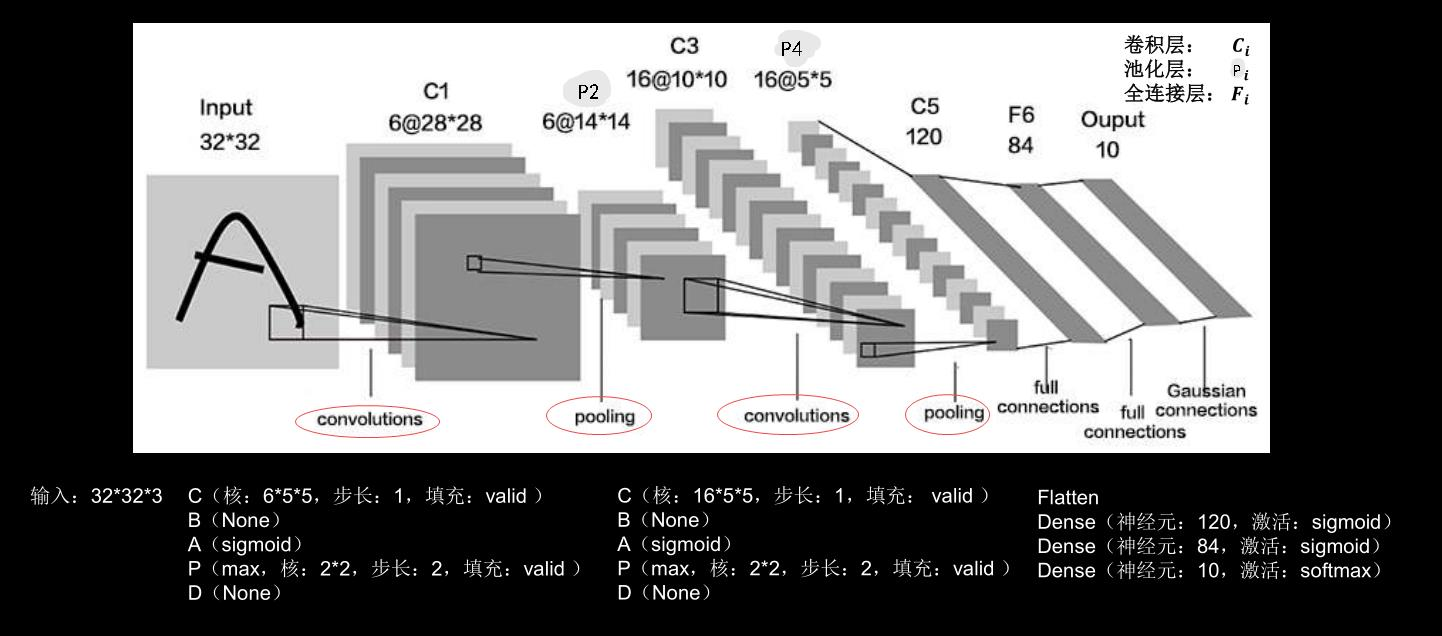

-------------------------读取已存模型----------------------------
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 19s 380us/sample - loss: 0.9768 - sparse_categorical_accuracy: 0.6531 - val_loss: 1.1405 - val_sparse_categorical_accuracy: 0.5975
Epoch 2/5
50000/50000 [==============================] - 16s 319us/sample - loss: 0.9610 - sparse_categorical_accuracy: 0.6599 - val_loss: 1.1232 - val_sparse_categorical_accuracy: 0.6060
Epoch 3/5
50000/50000 [==============================] - 16s 321us/sample - loss: 0.9445 - sparse_categorical_accuracy: 0.6641 - val_loss: 1.1509 - val_sparse_categorical_accuracy: 0.6008
Epoch 4/5
50000/50000 [==============================] - 16s 324us/sample - loss: 0.9345 - sparse_categorical_accuracy: 0.6688 - val_loss: 1.1329 - val_sparse_categorical_accuracy: 0.6010
Epoch 5/5
50000/50000 [==============================] - 18s 365us/sample - loss: 0.9182 - sparse_categorical_accuracy: 0.6748 - val_loss:

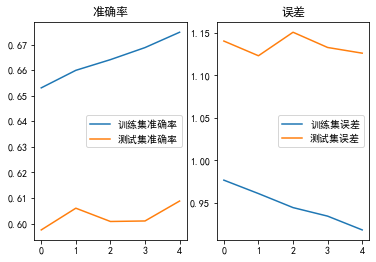

In [9]:
# ****************************     LeNet卷积神经网络     *****************************
# =============================        1.import          =============================
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
# =============================     2.测试集、训练集     =============================
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# ==============================  3.卷积神经网络的搭建  ==============================

# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New
class LeNet(Model):
    def __init__(self):
        super(LeNet, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation='sigmoid')   # 卷积层 C
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')  # 池化层 P
        self.c3 = Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation='sigmoid')   # 卷积层 C
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='valid')  # 池化层 P
        
        self.flatten = Flatten()
        self.f1 = Dense(120, activation='sigmoid')
        self.f2 = Dense(84, activation='sigmoid')
        self.f3 = Dense(10, activation='softmax')
    def call(self, x):
        x = self.c1(x)
        x = self.p2(x)
        x = self.c3(x)
        x = self.p4(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y
model = LeNet()
# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New

# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] 
)
# =============================      5.断点续训     ==========================

checkpoint_save_path = '../class5/CIFAR10_CNN/checkpoint/LeNet.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------------------读取已存模型----------------------------')
    model.load_weights(checkpoint_save_path)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only = True)

history = model.fit(x_train,y_train,batch_size=32,epochs=5,
                    validation_data=(x_test, y_test),validation_freq=1,
                    callbacks = [ckpt_callback])

# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()
# =============================  7.参数提取，把参数存入文本  =========================
np.set_printoptions(threshold=np.inf) # 超过多少省略打印
# print(model.trainable_variables) # 打印所有可训练参数
file = open('../class5/CIFAR10_CNN/checkpoint/LeNet_weights.txt', 'w')
for v in model.trainable_variables: # 将参数写入txt文本
   file.write(str(v.name) + '\n')
   file.write(str(v.shape) + '\n')
   file.write(str(v.numpy()) + '\n')
file.close()
# =============================  8.显示训练集和验证集的acc和loss曲线  =========================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='训练集准确率')
plt.plot(val_acc, label='测试集准确率')
plt.title('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='训练集误差')
plt.plot(val_loss, label='测试集误差')
plt.title('误差')
plt.legend()
plt.show()

# AlexNet卷积神经计算网络
AlexNet网络诞生于2012年，当年ImageNet竞赛的冠军，Top5错误率为16.4%。  
*Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton. ImageNet Classification with Deep Convolutional Neural Networks. In NIPS, 2012.*
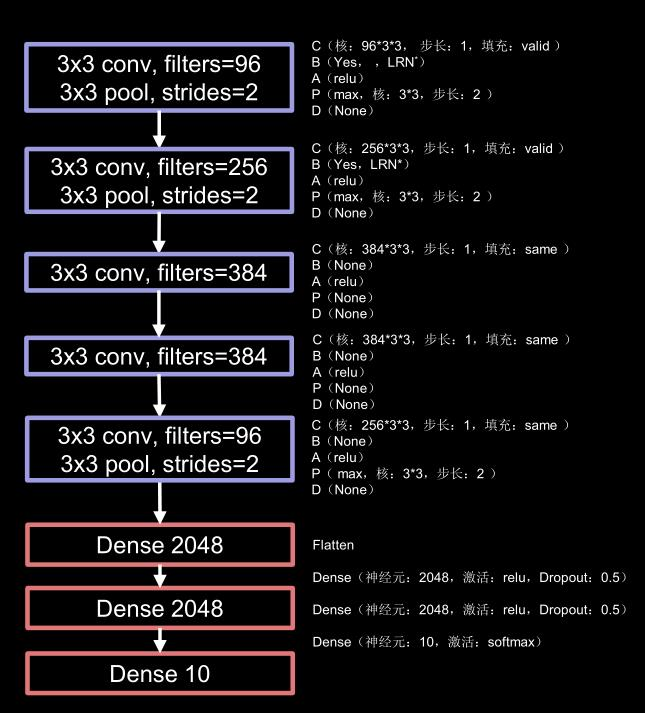

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 535s 11ms/sample - loss: 1.6351 - sparse_categorical_accuracy: 0.3980 - val_loss: 1.7196 - val_sparse_categorical_accuracy: 0.4017
Epoch 2/5
50000/50000 [==============================] - 542s 11ms/sample - loss: 1.2882 - sparse_categorical_accuracy: 0.5508 - val_loss: 1.3088 - val_sparse_categorical_accuracy: 0.5459
Epoch 3/5
50000/50000 [==============================] - 526s 11ms/sample - loss: 1.1436 - sparse_categorical_accuracy: 0.6045 - val_loss: 1.2924 - val_sparse_categorical_accuracy: 0.5434
Epoch 4/5
50000/50000 [==============================] - 538s 11ms/sample - loss: 1.0520 - sparse_categorical_accuracy: 0.6358 - val_loss: 1.0742 - val_sparse_categorical_accuracy: 0.6262
Epoch 5/5
50000/50000 [==============================] - 548s 11ms/sample - loss: 0.9927 - sparse_categorical_accuracy: 0.6590 - val_loss: 1.3061 - val_sparse_categorical_accuracy: 0.5657
Model: "al

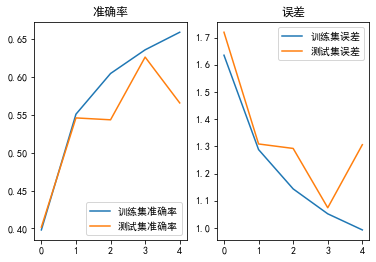

In [10]:
# ****************************    AlexNet卷积神经网络     ****************************
# =============================        1.import          =============================
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
# =============================     2.测试集、训练集     =============================
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# ==============================  3.卷积神经网络的搭建  ==============================

# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New
class AlexNet(Model):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.c1 = Conv2D(filters=96, kernel_size=(3, 3))
        self.b1 = BatchNormalization()
        self.a1 = Activation('relu')
        self.p1 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c2 = Conv2D(filters=256, kernel_size=(3, 3))
        self.b2 = BatchNormalization()
        self.a2 = Activation('relu')
        self.p2 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.c3 = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')
                         
        self.c4 = Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu')
                         
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same',activation='relu')
        self.p5 = MaxPool2D(pool_size=(3, 3), strides=2)

        self.flatten = Flatten()
        self.f1 = Dense(2048, activation='relu')
        self.d1 = Dropout(0.5)
        
        self.f2 = Dense(2048, activation='relu')
        self.d2 = Dropout(0.5)
        
        self.f3 = Dense(10, activation='softmax')
    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)

        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)

        x = self.c3(x)

        x = self.c4(x)

        x = self.c5(x)
        x = self.p5(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d1(x)
        x = self.f2(x)
        x = self.d2(x)
        y = self.f3(x)
        return y
model = AlexNet()
# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New

# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] 
)
# =============================      5.断点续训     ==========================

checkpoint_save_path = '../class5/CIFAR10_CNN/checkpoint/AlexNet.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------------------读取已存模型----------------------------')
    model.load_weights(checkpoint_save_path)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only = True)

history = model.fit(x_train,y_train,batch_size=32,epochs=5,
                    validation_data=(x_test, y_test),validation_freq=1,
                    callbacks = [ckpt_callback])

# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()
# =============================  7.参数提取，把参数存入文本  =========================
np.set_printoptions(threshold=np.inf) # 超过多少省略打印
# print(model.trainable_variables) # 打印所有可训练参数
file = open('../class5/CIFAR10_CNN/checkpoint/AlexNet_weights.txt', 'w')
for v in model.trainable_variables: # 将参数写入txt文本
   file.write(str(v.name) + '\n')
   file.write(str(v.shape) + '\n')
   file.write(str(v.numpy()) + '\n')
file.close()
# =============================  8.显示训练集和验证集的acc和loss曲线  =========================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='训练集准确率')
plt.plot(val_acc, label='测试集准确率')
plt.title('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='训练集误差')
plt.plot(val_loss, label='测试集误差')
plt.title('误差')
plt.legend()
plt.show()

# VGGNet卷积神经计算网络
**网络规整，比较适合硬件加速。**  
VGGNet诞生于2014年，当年ImageNet竞赛的亚军，Top5错误率减小到7.3%。  
*K. Simonyan, A. Zisserman. Very Deep Convolutional Networks for Large-Scale Image Recognition.In ICLR, 2015.*
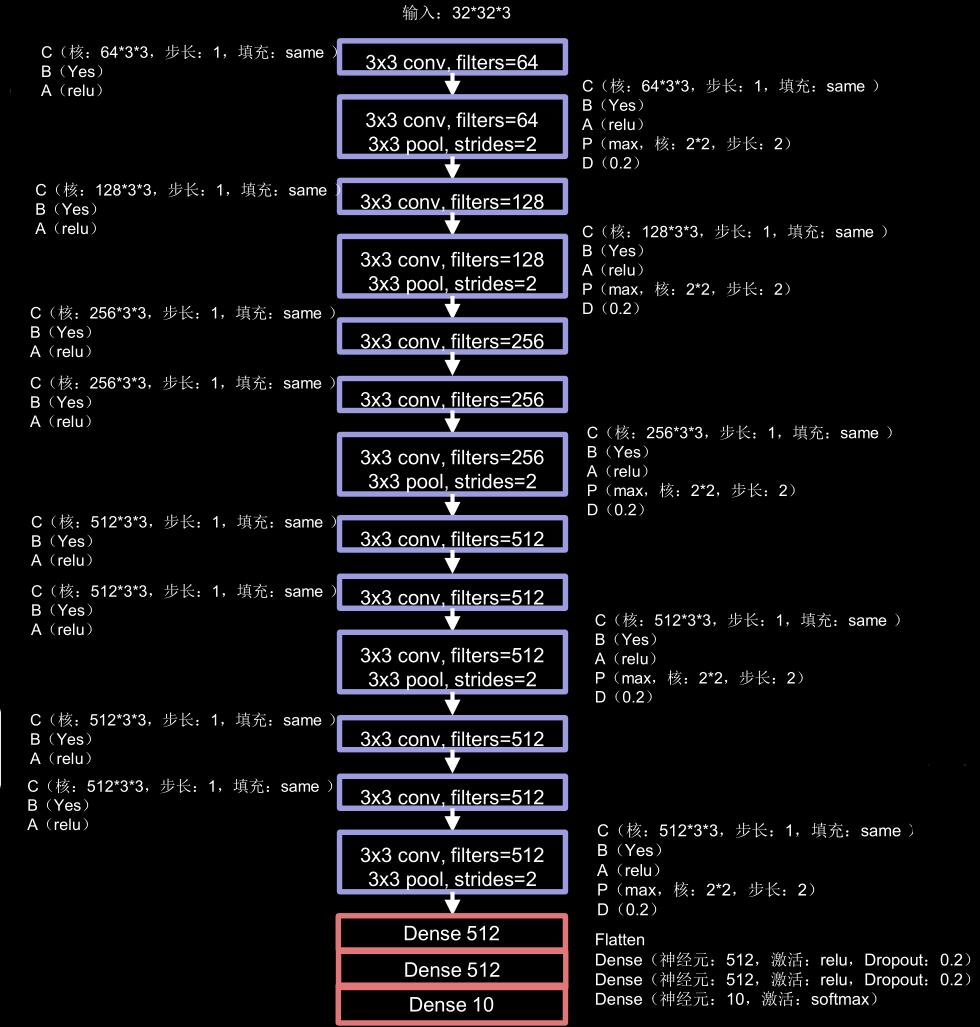

In [ ]:
# *****************************    VGGNet卷积神经网络     ****************************
# =============================        1.import          =============================
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
# =============================     2.测试集、训练集     =============================
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# ==============================  3.卷积神经网络的搭建  ==============================

# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New
class VGGNet(Model):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  # 卷积层1
        self.b1 = BatchNormalization()  # BN层1
        self.a1 = Activation('relu')  # 激活层1
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()  # BN层1
        self.a2 = Activation('relu')  # 激活层1
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  # BN层1
        self.a3 = Activation('relu')  # 激活层1
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  # BN层1
        self.a4 = Activation('relu')  # 激活层1
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)  # dropout层

        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization()  # BN层1
        self.a5 = Activation('relu')  # 激活层1
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  # BN层1
        self.a6 = Activation('relu')  # 激活层1
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p7 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d7 = Dropout(0.2)

        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()  # BN层1
        self.a8 = Activation('relu')  # 激活层1
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()  # BN层1
        self.a9 = Activation('relu')  # 激活层1
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p10 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d10 = Dropout(0.2)

        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()  # BN层1
        self.a11 = Activation('relu')  # 激活层1
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()  # BN层1
        self.a12 = Activation('relu')  # 激活层1
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p13 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d13 = Dropout(0.2)

        self.flatten = Flatten()
        self.f1 = Dense(512, activation='relu')
        self.D1 = Dropout(0.2)
        self.f2 = Dense(512, activation='relu')
        self.D2 = Dropout(0.2)
        self.f3 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        x = self.d2(x)

        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p4(x)
        x = self.d4(x)

        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p7(x)
        x = self.d7(x)

        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p10(x)
        x = self.d10(x)

        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p13(x)
        x = self.d13(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.D1(x)
        x = self.f2(x)
        x = self.D2(x)
        y = self.f3(x)
        return y
model = VGGNet()
# -New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New-New

# =============================    4.Compile 配置训练方法   ==========================
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['sparse_categorical_accuracy'] 
)
# =============================      5.断点续训     ==========================

checkpoint_save_path = '../class5/CIFAR10_CNN/checkpoint/Baseline.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------------------读取已存模型----------------------------')
    model.load_weights(checkpoint_save_path)
    
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_save_path,
    save_weights_only = True,
    save_best_only = True)

history = model.fit(x_train,y_train,batch_size=32,epochs=5,
                    validation_data=(x_test, y_test),validation_freq=1,
                    callbacks = [ckpt_callback])

# ==========================  6.summary 打印网络结构和参数统计  ======================
model.summary()
# =============================  7.参数提取，把参数存入文本  =========================
np.set_printoptions(threshold=np.inf) # 超过多少省略打印
# print(model.trainable_variables) # 打印所有可训练参数
file = open('../class5/CIFAR10_CNN/checkpoint/weights.txt', 'w')
for v in model.trainable_variables: # 将参数写入txt文本
   file.write(str(v.name) + '\n')
   file.write(str(v.shape) + '\n')
   file.write(str(v.numpy()) + '\n')
file.close()
# =============================  8.显示训练集和验证集的acc和loss曲线  =========================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='训练集准确率')
plt.plot(val_acc, label='测试集准确率')
plt.title('准确率')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='训练集误差')
plt.plot(val_loss, label='测试集误差')
plt.title('误差')
plt.legend()
plt.show()